In [1]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [8]:
trainX, trainY, testX, testY = mnist.load_data("../data/mnist",one_hot=True)

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


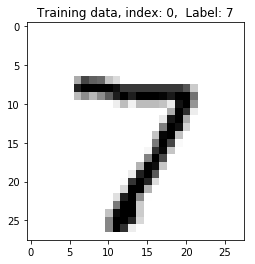

In [5]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def display_digit(index):
    label = testY[index].argmax(axis=0)
    
    #label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = testX[index,].reshape([28,28])
    #image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
display_digit(0)

In [11]:
#Define graph
tf.reset_default_graph()
    
# Inputs
net = tflearn.input_data([None, trainX.shape[1]])

# Hidden layer
net = tflearn.fully_connected(net, 256, activation='ReLU')

# Output
net = tflearn.fully_connected(net, 10, activation='softmax')

net = tflearn.regression(net, optimizer='sgd', learning_rate=0.001, loss='categorical_crossentropy')

model = tflearn.DNN(net)

model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=128, n_epoch=50)

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

Training Step: 19349  | total loss: 0.46744 | time: 2.207s
| SGD | epoch: 050 | loss: 0.46744 - acc: 0.8704 -- iter: 49408/49500
Training Step: 19350  | total loss: 0.47111 | time: 3.225s
| SGD | epoch: 050 | loss: 0.47111 - acc: 0.8716 | val_loss: 0.45107 - val_acc: 0.8847 -- iter: 49500/49500
--
Test accuracy:  0.8897
